<font size="5"><b><center>TEXT ANALYSIS OF  DATA</center></b></font>
<font size="2"><b><center>MIDTERM</center></b></font>

<font size="3"><b>AUTHENTICATION</b></font>

In [98]:
# Install the PRAW library
!pip install praw
# Upgrade pip to the latest version
!pip install --upgrade pip
# Import the PRAW library
import praw
# Define a user agent for Reddit API access
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
# Initialize a Reddit instance with your client ID, client secret, and user agent
reddit = praw.Reddit(
    client_id="Wh5cuCdnDE0TlrdwqRs1qA",
    client_secret="WXreR0UqYEA-lkRKSdpOUYsbeReo1Q",
    user_agent=user_agent
)

<font size="3"><b>GET TRENDING TOPIC FROM SUBREDDIT</b></font>

<font size="2">The <B>"Valentine"</B> subreddit channel will be use for this project</font>

In [99]:
!pip install pandas
!pip install numpy
!pip install pyarrow

import pandas as pd
import numpy as np
import re #RegEx : Regular expression# Hot new rising topics

# Retrieving data from the "Valentine" subreddit
headlines = set()
for submission in reddit.subreddit("Valentine").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
    
# Print the number of unique headlines retrieved    
print(len(headlines))

I know Saint-Valentine's day was a few months ago, but I think everyone would like to receive a heart bookmark these days. Support your friends and family in these hard times and send them a gift 💝 (link to video tutorial in the comments)
frqtou
louisart4402
1585575038.0
5
1.0
https://youtu.be/tYN4E7g8o0g
0


<font size="3"><b>GET TOTAL COMMENT IN SUBREDDIT</b></font>

In [100]:
# Initialize an empty set to store unique submission titles
headlines = set()
# Iterate over each submission in the "bitcoin" subreddit that is currently hot
for submission in reddit.subreddit("Valentine").hot(limit=None):
    # Add the title of each submission to the set of headlines
    headlines.add(submission.title)
# Print the total number of unique titles collected
print(len(headlines))

596


<font size="3"><b>CREATING A DATAFRAME</b></font>

In [101]:
#Create a dataframe from the scrapped data 
Valentine_df = pd.DataFrame(headlines)
Valentine_df.head()

,0
0,A cool tip for Valentines Day
1,Angelei Agad - Hello Folks! Valentine's day is...
2,Love Heart Valentines Plaque
3,VALENTINES DAY | SAKHT LAUNDA | Yeah Seen
4,so my girlfriend is an artist and always tryin...


<font size="3"><b>DISPLAYING ROWS OF A DATAFRAME</b></font>

In [102]:
#df = df.iloc[:, 1:]
# Display the first few rows of the Bitcoin DataFrame
Valentine_df.head()

,0
0,A cool tip for Valentines Day
1,Angelei Agad - Hello Folks! Valentine's day is...
2,Love Heart Valentines Plaque
3,VALENTINES DAY | SAKHT LAUNDA | Yeah Seen
4,so my girlfriend is an artist and always tryin...


<font size="3"><b>DISPLAYING COLUMNS OF A DATAFRAME</b></font>

In [103]:
# Display the column names of the Bitcoin DataFrame
Valentine_df.columns

RangeIndex(start=0, stop=1, step=1)

<font size="3"><b>RENAMING COLUMN OF A DATAFRAME</b></font>

In [104]:
# Renaming the column of the Bitcoin DataFrame to 'Titles' and displaying the first few rows
Valentine_df.columns = ['Titles']
Valentine_df.head()

,Titles
0,A cool tip for Valentines Day
1,Angelei Agad - Hello Folks! Valentine's day is...
2,Love Heart Valentines Plaque
3,VALENTINES DAY | SAKHT LAUNDA | Yeah Seen
4,so my girlfriend is an artist and always tryin...


<font size="3"><b>PRINTING DATA TYPES OF COLUMNS</b></font>

In [105]:
# df.dtypes returns data types of the data frame
Valentine_df.dtypes

Titles    object
dtype: object

<font size="3"><b>PRINTING INFORMATION OF DATA</b></font>

In [106]:
#df.info returns concise summary of a DataFrame
Valentine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titles  596 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB


<font size="3"><b>PRINTING STATISTICAL INFORMATION OF DATA</b></font>

In [107]:
#The df.describe() method in pandas is used to generate descriptive statistics of the central tendency, dispersion, and shape of a DataFrame's distribution, excluding NaN values
Valentine_df.describe()

,Titles
count,596
unique,596
top,A cool tip for Valentines Day
freq,1


<font size="3"><b>ADDING A NEW COLUMN TO THE DATAFRAME</b></font>

In [108]:
#Let’s add a new column with the length of the “text” column
#df['text']: Selects the 'text' column from the DataFrame.
#.str.len(): Applies the len() function to each element in the 'text' column, returning the length of each string.
#df['length'] = ...: Creates a new column named 'length' in the DataFrame and assigns the calculated lengths to this column

Valentine_df['length'] = Valentine_df['Titles'].str.len()
Valentine_df.describe()

,length
count,596.000000
mean,50.424497
std,27.757824
min,3.000000
25%,32.000000
50%,46.000000
75%,61.000000
max,258.000000


<font size="3"><b>PRINTING INFORMATION OF DATAFRAMEE</b></font>

In [109]:
#The df.describe(include='O') output will show statistics for each object (string) column in your DataFrame.
Valentine_df.describe(include='O')

,Titles
count,596
unique,596
top,A cool tip for Valentines Day
freq,1


<font size="3"><b>CHECKING DUPLICATE TITLES OF A DATAFRAME</b></font>

In [110]:
# Checking for duplicate titles in the Bitcoin DataFrame and counting the occurrences
Valentine_df.Titles.duplicated().sum() 

0

<font size="3"><b>FINDING A MISSING VALUES OF DATAFRAMEE</b></font>

In [111]:
#df.isna().sum() output will show the count of missing values for each column in your DataFrame.
Valentine_df.isna().sum()

Titles    0
length    0
dtype: int64

<font size="3"><b>CONVERTING UPPERCASE AND LOWERCASE</b></font>

In [112]:
#df['Titles'] = df['Titles'].str.upper(): Converts the values in the 'speaker' column to uppercase.


Valentine_df['Titles'] = Valentine_df['Titles'].str.upper()
print (Valentine_df)

                                                Titles  length
0                        A COOL TIP FOR VALENTINES DAY      29
1    ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...      61
2                         LOVE HEART VALENTINES PLAQUE      28
3            VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN      41
4    SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...     102
..                                                 ...     ...
591  VALENTINES DAY SALE ON NEWADULTOYS.COM!!! 10% ...      81
592                   HAPPY (ANTI) VALENTINE'S DAY! ;)      32
593  BEST ROMANTIC MOVIES TO RELISH WITH YOUR BAE T...      59
594            GEEKY VALENTINE'S DAY GIFT IDEAS NEEDED      39
595   A VALENTINE WEEKEND BREAK IN MADRID CITY CENTRE.      48

[596 rows x 2 columns]


<font size="3"><b>CLEANING THE TEXT</b></font>

In [113]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
Valentine_df["Titles"]= Valentine_df["Titles"].apply(cleanTxt)

#Show the clean text
Valentine_df.head()

,Titles,length
0,A COOL TIP FOR VALENTINES DAY,29
1,ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...,61
2,LOVE HEAVALENTINES PLAQUE,28
3,VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN,41
4,SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...,102


<font size="3"><b>REMOVING EMOJI AND UNICODE</b></font>

In [114]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Valentine_df["Titles"]= Valentine_df["Titles"].apply(remove_emoji)

#Show the clean text
Valentine_df.head()

,Titles,length
0,A COOL TIP FOR VALENTINES DAY,29
1,ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...,61
2,LOVE HEAVALENTINES PLAQUE,28
3,VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN,41
4,SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...,102


<font size="3"><b>PLOTTING CHARTS</b></font>

Text(0.5, 1.0, 'Line Plot of Length Column')

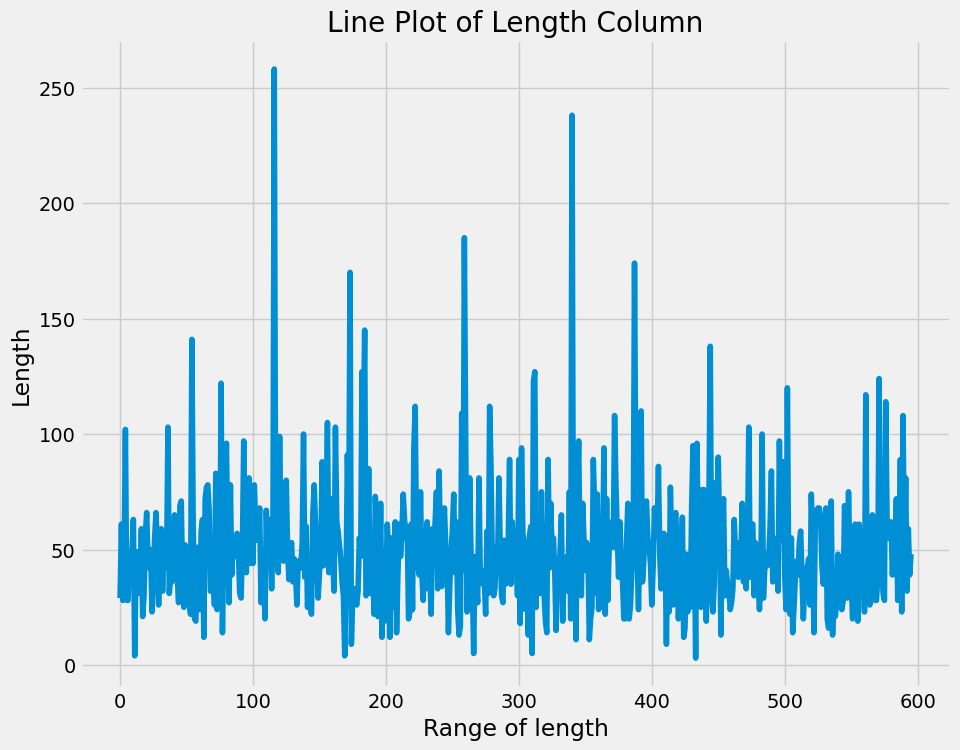

In [115]:
#df['length'].plot(): This creates a line plot for the 'length' column. The x-axis will likely represent the index of the DataFrame, and the y-axis will represent the values in the 'length' column.
#df['length'].plot(kind='box', vert=False): This creates a horizontal box plot for the 'length' column. Box plots provide a visual summary of the distribution of data, including the median, quartiles, and potential outliers.

!pip install matplotlib

import matplotlib.pyplot as plt
Valentine_df['length'].plot()
plt.xlabel('Range of length') 
plt.ylabel('Length')
plt.title('Line Plot of Length Column') 

<font size="3"><b>BOX PLOT</b></font>

Text(0.5, 1.0, 'Box Plot of Length Column')

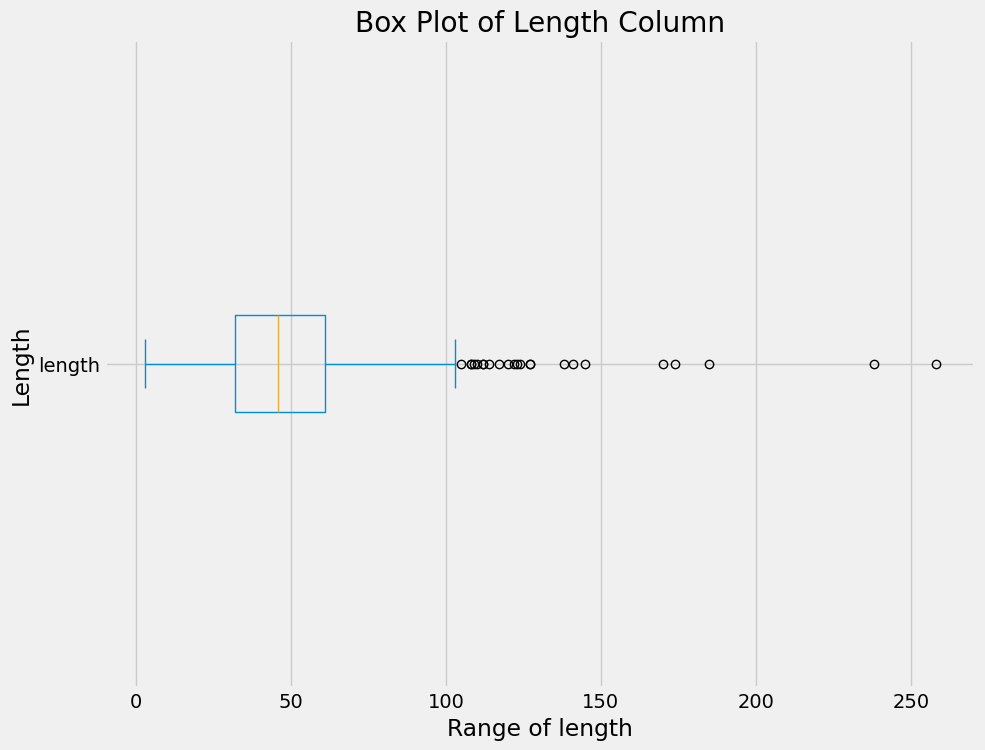

In [116]:
Valentine_df['length'].plot(kind='box', vert=False)
plt.xlabel('Range of length')
plt.ylabel('Length') 
plt.title('Box Plot of Length Column') 

<font size="3"><b>HISTOGRAM</b></font>

Text(0.5, 1.0, 'Histogram of Length Column')

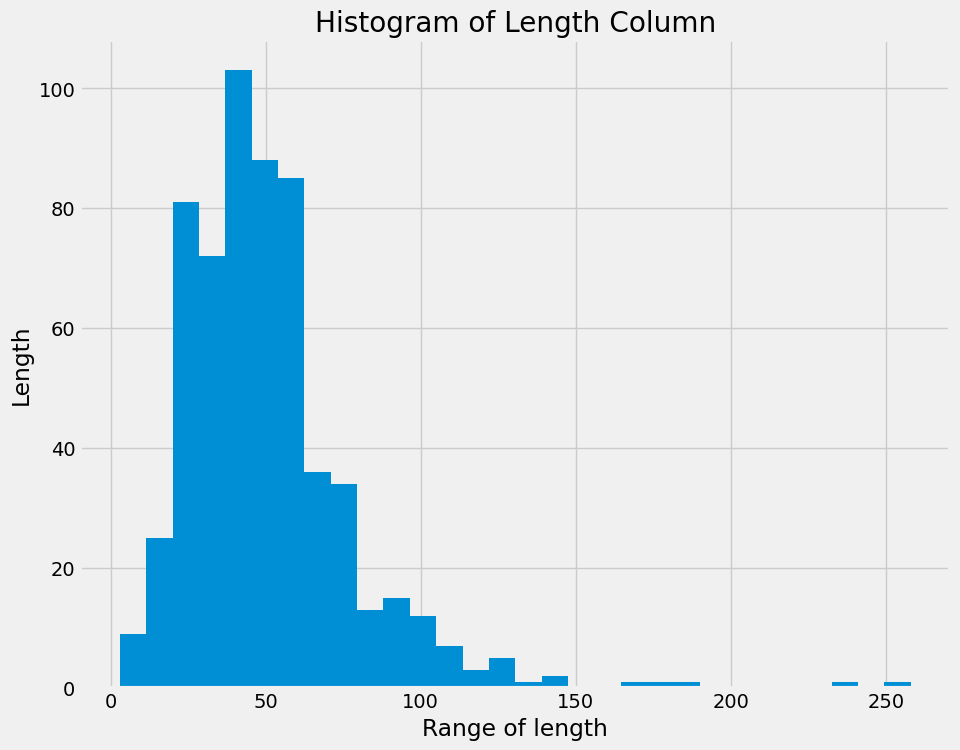

In [117]:
#df['length'].plot(kind='hist', bins=30): This creates a histogram for the 'length' column with 30 bins. The x-axis represents the range of 'length' values, and the y-axis represents the frequency or count of values within each bin.

Valentine_df['length'].plot(kind='hist', bins=30)
plt.xlabel('Range of length')  
plt.ylabel('Length')  
plt.title('Histogram of Length Column') 

<font size="3"><b>REGEX TO PULL OUT WORDS</b></font>

In [118]:
!pip install regex
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', Titles)


Valentine_df['tokenized_Titles'] = Valentine_df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(Valentine_df[['Titles', 'tokenized_Titles']].head())


                                              Titles  \
0                      A COOL TIP FOR VALENTINES DAY   
1  ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...   
2                          LOVE HEAVALENTINES PLAQUE   
3          VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN   
4  SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...   

                                    tokenized_Titles  
0               [A, COOL, TIP, FOR, VALENTINES, DAY]  
1  [ANGELEI, AGAD, HELLO, FOLKS, VALENTINE, S, DA...  
2                      [LOVE, HEAVALENTINES, PLAQUE]  
3       [VALENTINES, DAY, SAKHT, LAUNDA, YEAH, SEEN]  
4  [SO, MY, GIRLFRIEND, IS, AN, ARTIST, AND, ALWA...  


<font size="3"><b>FUNCTION TO TOKENIZE</b></font>

In [119]:
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)
    
Valentine_df['tokenized_Titles'] = Valentine_df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(Valentine_df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0                      A COOL TIP FOR VALENTINES DAY   
1  ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...   
2                          LOVE HEAVALENTINES PLAQUE   
3          VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN   
4  SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...   

                                    tokenized_Titles  
0               [A, COOL, TIP, FOR, VALENTINES, DAY]  
1  [ANGELEI, AGAD, HELLO, FOLKS, VALENTINE, S, DA...  
2                      [LOVE, HEAVALENTINES, PLAQUE]  
3  [VALENTINES, DAY, |, SAKHT, LAUNDA, |, YEAH, S...  
4  [SO, MY, GIRLFRIEND, IS, AN, ARTIST, AND, ALWA...  


<font size="3"><b>STOPWORDS FROM DATASET</b></font>

In [120]:
!pip install nltk

import nltk
import pandas as pd

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Display the DataFrame
print(Valentine_df.head())  

{'ve', "you're", 'each', 'ain', 'don', "won't", 'its', 'while', 'was', 'having', 'because', "mustn't", 'to', 'ours', 'hasn', 'mightn', "mightn't", 'who', 'theirs', 'can', "don't", "hadn't", 'same', "doesn't", 'on', "it's", 'll', 'these', 'where', 'now', 'were', "hasn't", "shan't", 'again', 'against', 'being', 'their', 'themselves', 'me', 'not', 'should', 'when', 'if', 'shouldn', 'a', 'doesn', 'as', 'why', 'too', 'we', 'haven', "you've", 'weren', 'own', 'itself', 'for', "that'll", 'our', 're', "needn't", 'them', 'under', 'some', 'am', 'wouldn', 'other', 'm', 'after', 'be', 'of', 'about', 'such', 'do', 'few', 'whom', 'how', 't', 'wasn', 'with', 'they', 'most', "haven't", 'hers', 'very', 'nor', 'further', 'i', 'that', 'have', "you'll", 'what', 'won', 'myself', 'so', 'her', 'he', 'had', 'above', 'this', 'out', 'here', 'down', "should've", 'off', "couldn't", 'yours', 's', 'yourselves', 'in', "she's", 'couldn', 'through', 'ourselves', 'does', 'more', 'herself', 'my', 'is', 'didn', 'into', 'a

<font size="3"><b>REMOVING STOPWORDS</b></font>

In [121]:
#function to remove stop words
import pandas as pd
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Read the CSV file into a DataFrame
Valentine_df['cleantokens'] = Valentine_df['Titles'].apply(lambda x: remove_stop(str(x).split()))

# Display the DataFrame with the cleaned tokens
print(Valentine_df[['Titles', 'cleantokens']].tail())

                                                Titles  \
591  VALENTINES DAY SALE ON NEWADULTOYS.COM!!! 10% ...   
592                   HAPPY (ANTI) VALENTINE'S DAY! ;)   
593  BEST ROMANTIC MOVIES TO RELISH WITH YOUR BAE T...   
594            GEEKY VALENTINE'S DAY GIFT IDEAS NEEDED   
595   A VALENTINE WEEKEND BREAK IN MADRID CITY CENTRE.   

                                           cleantokens  
591  [VALENTINES, DAY, SALE, NEWADULTOYS.COM!!!, 10...  
592             [HAPPY, (ANTI), VALENTINE'S, DAY!, ;)]  
593   [BEST, ROMANTIC, MOVIES, RELISH, BAE, VALENTINE]  
594     [GEEKY, VALENTINE'S, DAY, GIFT, IDEAS, NEEDED]  
595  [VALENTINE, WEEKEND, BREAK, MADRID, CITY, CENT...  


<font size="3"><b>CREATING THE PIPELINE</b></font>

In [122]:
import pandas as pd
import nltk


stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the tokenize function (replace with your actual tokenize implementation)
def tokenize(Titles):
    return re.findall(r'\b\w+\b', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


Valentine_df['processed_Titles'] = Valentine_df['Titles'].apply(lambda x: prepare(str(x), pipeline))

# Display the DataFrame with the processed text
print(Valentine_df[['Titles', 'processed_Titles']].tail())


                                                Titles  \
591  VALENTINES DAY SALE ON NEWADULTOYS.COM!!! 10% ...   
592                   HAPPY (ANTI) VALENTINE'S DAY! ;)   
593  BEST ROMANTIC MOVIES TO RELISH WITH YOUR BAE T...   
594            GEEKY VALENTINE'S DAY GIFT IDEAS NEEDED   
595   A VALENTINE WEEKEND BREAK IN MADRID CITY CENTRE.   

                                      processed_Titles  
591  [valentines, day, sale, newadultoys, com, 10, ...  
592                      [happy, anti, valentine, day]  
593   [best, romantic, movies, relish, bae, valentine]  
594       [geeky, valentine, day, gift, ideas, needed]  
595  [valentine, weekend, break, madrid, city, centre]  


<font size="3"><b>RUN THE PIPELINE</b></font>

In [123]:
import pandas as pd
import regex as re

# Define the pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the tokenize function
def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


Valentine_df['tokens'] = Valentine_df['Titles'].apply(lambda x: prepare(str(x), pipeline=pipeline))

# Display the DataFrame with the processed tokens
print(Valentine_df[['Titles', 'tokens']].head())


                                              Titles  \
0                      A COOL TIP FOR VALENTINES DAY   
1  ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...   
2                          LOVE HEAVALENTINES PLAQUE   
3          VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN   
4  SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...   

                                              tokens  
0                       [cool, tip, valentines, day]  
1  [angelei, agad, hello, folks, valentine, day, ...  
2                      [love, heavalentines, plaque]  
3       [valentines, day, sakht, launda, yeah, seen]  
4  [girlfriend, artist, always, trying, get, figu...  


<font size="3"><b>COUNTING THE TOKENS</b></font>

In [124]:
#count the tokens
Valentine_df['num_tokens'] = Valentine_df['tokens'].map(len)
Valentine_df.tail()

,Titles,length,tokenized_Titles,cleantokens,processed_Titles,tokens,num_tokens
591,VALENTINES DAY SALE ON NEWADULTOYS.COM!!! 10% ...,81,"[VALENTINES, DAY, SALE, ON, NEWADULTOYS, COM, ...","[VALENTINES, DAY, SALE, NEWADULTOYS.COM!!!, 10...","[valentines, day, sale, newadultoys, com, 10, ...","[valentines, day, sale, newadultoys, com, 10, ...",9
592,HAPPY (ANTI) VALENTINE'S DAY! ;),32,"[HAPPY, ANTI, VALENTINE, S, DAY]","[HAPPY, (ANTI), VALENTINE'S, DAY!, ;)]","[happy, anti, valentine, day]","[happy, anti, valentine, day]",4
593,BEST ROMANTIC MOVIES TO RELISH WITH YOUR BAE T...,59,"[BEST, ROMANTIC, MOVIES, TO, RELISH, WITH, YOU...","[BEST, ROMANTIC, MOVIES, RELISH, BAE, VALENTINE]","[best, romantic, movies, relish, bae, valentine]","[best, romantic, movies, relish, bae, valentine]",6
594,GEEKY VALENTINE'S DAY GIFT IDEAS NEEDED,39,"[GEEKY, VALENTINE, S, DAY, GIFT, IDEAS, NEEDED]","[GEEKY, VALENTINE'S, DAY, GIFT, IDEAS, NEEDED]","[geeky, valentine, day, gift, ideas, needed]","[geeky, valentine, day, gift, ideas, needed]",6
595,A VALENTINE WEEKEND BREAK IN MADRID CITY CENTRE.,48,"[A, VALENTINE, WEEKEND, BREAK, IN, MADRID, CIT...","[VALENTINE, WEEKEND, BREAK, MADRID, CITY, CENT...","[valentine, weekend, break, madrid, city, centre]","[valentine, weekend, break, madrid, city, centre]",6


<font size="3"><b>WORD FREQUENCY ANALYSIS</b></font>

In [125]:
#Word frequency Analysis

from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


<font size="3"><b>ADDING DATA TO COUNT</b></font>

In [126]:
#Adding new data to the current count

more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)


Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


<font size="3"><b> LETS COUNT</b></font>

In [127]:
#Let’s count

counter = Counter()
Valentine_df['tokens'].map(counter.update)
print(counter.most_common(5))

[('valentine', 376), ('day', 360), ('valentines', 124), ('love', 63), ('happy', 56)]


<font size="3"><b>FREQUENCY OF DATAFRAME</b></font>

In [128]:
#Now, we put the word frequency in it’s own dataframe for analysis

freq_Valentine_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_Valentine_df = freq_Valentine_df.query('freq >= 1')
freq_Valentine_df.index.name = 'token'
print(freq_Valentine_df)

            freq
token           
cool           6
tip            1
valentines   124
day          360
angelei        1
...          ...
price          1
listings       1
relish         1
geeky          1
madrid         1

[1230 rows x 1 columns]


<font size="3"><b>SORT AND DISPLAY</b></font>

In [129]:
#Lets sort and display

freq_Valentine_df = freq_Valentine_df.sort_values('freq', ascending=False)
freq_Valentine_df.head(10)

,freq
token,
valentine,376
day,360
valentines,124
love,63
happy,56
gifts,49
ideas,47
gift,45
best,26


<font size="3"><b>FINDING INFORMATION OF FREQUENCY</b></font>

In [130]:
freq_Valentine_df.describe()

,freq
count,1230.000000
mean,2.855285
std,15.697720
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,376.000000


<font size="3"><b>BAR CHART</b></font>

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

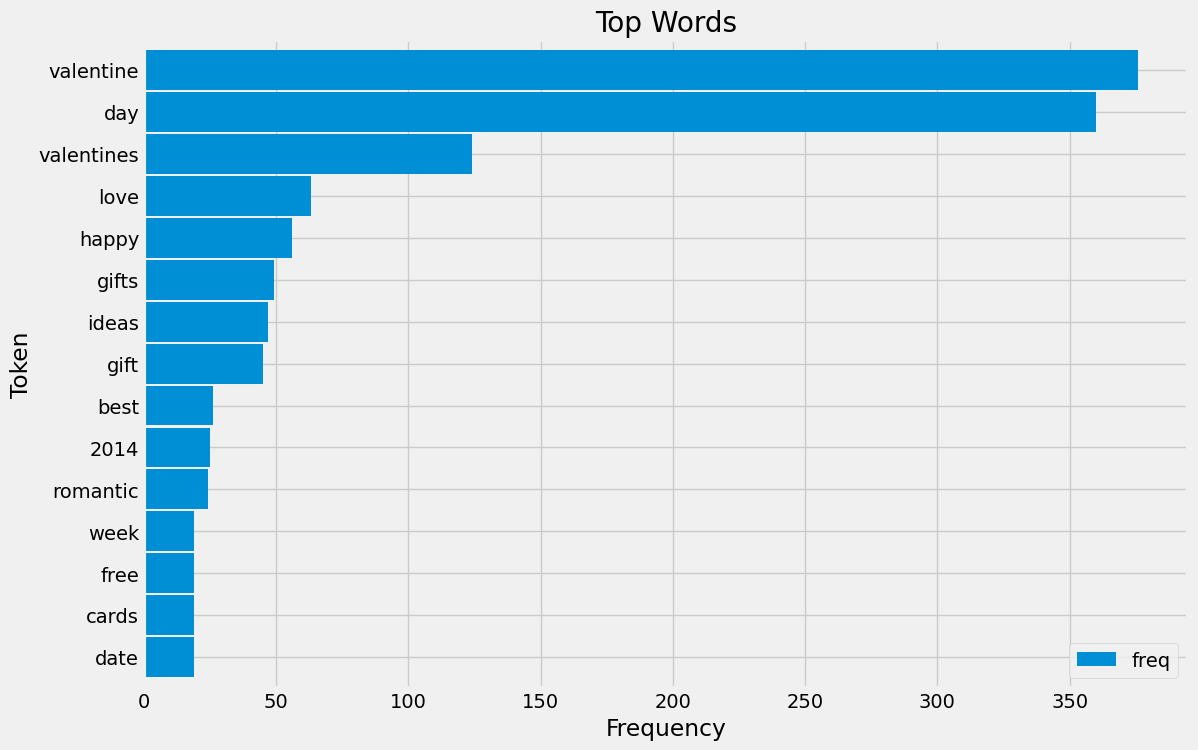

In [131]:
#Bar chart 

ax = freq_Valentine_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8),)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

<font size="3"><b>SENTIMENT ANALYSIS OF BITCOIN</b></font>

In [132]:
!pip install textblob

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Valentine_df['Subjectivity'] = Valentine_df['Titles'].apply(getSubjectivity)
Valentine_df['Polarity'] = Valentine_df['Titles'].apply(getPolarity)

#Now display data
Valentine_df.head()

,Titles,length,tokenized_Titles,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity
0,A COOL TIP FOR VALENTINES DAY,29,"[A, COOL, TIP, FOR, VALENTINES, DAY]","[COOL, TIP, VALENTINES, DAY]","[cool, tip, valentines, day]","[cool, tip, valentines, day]",4,0.65,0.35
1,ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...,61,"[ANGELEI, AGAD, HELLO, FOLKS, VALENTINE, S, DA...","[ANGELEI, AGAD, -, HELLO, FOLKS!, VALENTINE'S,...","[angelei, agad, hello, folks, valentine, day, ...","[angelei, agad, hello, folks, valentine, day, ...",7,1.00,1.00
2,LOVE HEAVALENTINES PLAQUE,28,"[LOVE, HEAVALENTINES, PLAQUE]","[LOVE, HEAVALENTINES, PLAQUE]","[love, heavalentines, plaque]","[love, heavalentines, plaque]",3,0.60,0.50
3,VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN,41,"[VALENTINES, DAY, |, SAKHT, LAUNDA, |, YEAH, S...","[VALENTINES, DAY, |, SAKHT, LAUNDA, |, YEAH, S...","[valentines, day, sakht, launda, yeah, seen]","[valentines, day, sakht, launda, yeah, seen]",6,0.00,0.00
4,SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...,102,"[SO, MY, GIRLFRIEND, IS, AN, ARTIST, AND, ALWA...","[GIRLFRIEND, ARTIST, ALWAYS, TRYING, GET, TOO,...","[girlfriend, artist, always, trying, get, figu...","[girlfriend, artist, always, trying, get, figu...",9,0.00,0.00


<font size="3"><b>CATEGORIZING BITCOIN REDDIT POSTS</b></font>

In [133]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the "Polarity" column of the DataFrame
# and store the resulting sentiment insights in a new column named "Insight"   
Valentine_df["Insight"] = Valentine_df["Polarity"].apply(getInsight)

# Display the first 50 rows of the DataFrame with the newly added "Insight" column
Valentine_df.head(50)

,Titles,length,tokenized_Titles,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity,Insight
0,A COOL TIP FOR VALENTINES DAY,29,"[A, COOL, TIP, FOR, VALENTINES, DAY]","[COOL, TIP, VALENTINES, DAY]","[cool, tip, valentines, day]","[cool, tip, valentines, day]",4,0.650000,0.350000,Positive
1,ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...,61,"[ANGELEI, AGAD, HELLO, FOLKS, VALENTINE, S, DA...","[ANGELEI, AGAD, -, HELLO, FOLKS!, VALENTINE'S,...","[angelei, agad, hello, folks, valentine, day, ...","[angelei, agad, hello, folks, valentine, day, ...",7,1.000000,1.000000,Positive
2,LOVE HEAVALENTINES PLAQUE,28,"[LOVE, HEAVALENTINES, PLAQUE]","[LOVE, HEAVALENTINES, PLAQUE]","[love, heavalentines, plaque]","[love, heavalentines, plaque]",3,0.600000,0.500000,Positive
3,VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN,41,"[VALENTINES, DAY, |, SAKHT, LAUNDA, |, YEAH, S...","[VALENTINES, DAY, |, SAKHT, LAUNDA, |, YEAH, S...","[valentines, day, sakht, launda, yeah, seen]","[valentines, day, sakht, launda, yeah, seen]",6,0.000000,0.000000,Neutral
4,SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...,102,"[SO, MY, GIRLFRIEND, IS, AN, ARTIST, AND, ALWA...","[GIRLFRIEND, ARTIST, ALWAYS, TRYING, GET, TOO,...","[girlfriend, artist, always, trying, get, figu...","[girlfriend, artist, always, trying, get, figu...",9,0.000000,0.000000,Neutral
5,VALENTINE'S DAY ROMANTIC SMS,28,"[VALENTINE, S, DAY, ROMANTIC, SMS]","[VALENTINE'S, DAY, ROMANTIC, SMS]","[valentine, day, romantic, sms]","[valentine, day, romantic, sms]",4,0.500000,0.000000,Neutral
6,MOST ROMANTIC VALENTINE SONG,28,"[MOST, ROMANTIC, VALENTINE, SONG]","[ROMANTIC, VALENTINE, SONG]","[romantic, valentine, song]","[romantic, valentine, song]",3,0.500000,0.250000,Positive
7,IF YOU WANT SOME FUN IDEAS FOR VALENTINE'S DAY D,49,"[IF, YOU, WANT, SOME, FUN, IDEAS, FOR, VALENTI...","[WANT, FUN, IDEAS, VALENTINE'S, DAY]","[want, fun, ideas, valentine, day]","[want, fun, ideas, valentine, day]",5,0.200000,0.300000,Positive
8,CELEBRATE LOVE ON VALENTINES DAY TECH HACKS,44,"[CELEBRATE, LOVE, ON, VALENTINES, DAY, TECH, H...","[CELEBRATE, LOVE, VALENTINES, DAY, TECH, HACKS]","[celebrate, love, valentines, day, tech, hacks]","[celebrate, love, valentines, day, tech, hacks]",6,0.600000,0.500000,Positive
9,GIVING CUPCAKES TO PEOPLE WHO DONT HAVE VALENT...,50,"[GIVING, CUPCAKES, TO, PEOPLE, WHO, DONT, HAVE...","[GIVING, CUPCAKES, PEOPLE, DONT, VALENTINES]","[giving, cupcakes, people, dont, valentines]","[giving, cupcakes, people, dont, valentines]",5,0.000000,0.000000,Neutral


<font size="3"><b>DATA VISUALIZATION<b></font>

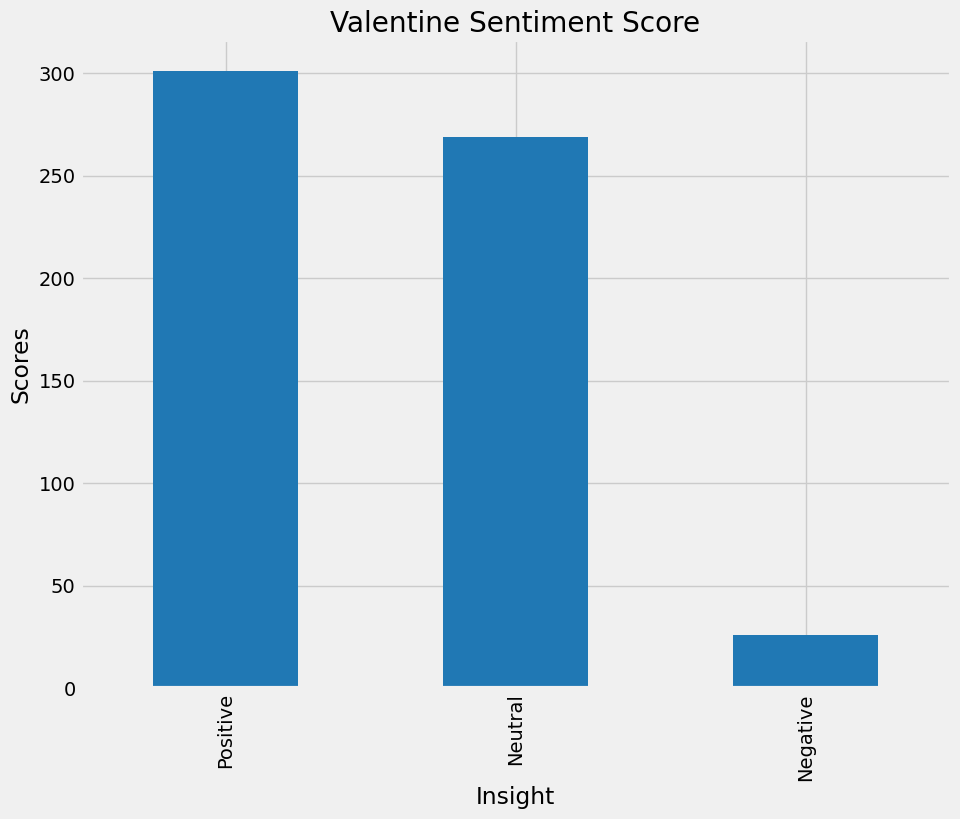

In [134]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Valentine Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
Valentine_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

<font size="3"><b>EXPLORING SENTIMENT LEXICON AND TOKENIZING OF DATASET</b></font>

In [135]:
# Install scikit-learn library
!pip install scikit-learn
# Install NLTK library 
!pip install nltk

# Import necessary modules from scikit-learn and NLTK libraries
from sklearn import preprocessing
import nltk

# Import the opinion lexicon corpus from NLTK
from nltk.corpus import opinion_lexicon
# Import the word_tokenize function from NLTK, which is used for tokenization
from nltk.tokenize import word_tokenize


# Print the total number of words in the opinion lexicon dataset
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
# Print examples of positive words from the opinion lexicon dataset
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
# Print examples of negative words from the opinion lexicon dataset
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


<font size="3"><b>CONSTRUCTING SENTIMENT SCORING DICTIONARY OF DATASET</b></font>

In [136]:
# Let's create a dictionary which we can use for scoring our review titles

Valentine_df.rename(columns={"reviewTitles": "Titles"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score
    
#Printing a dictionary
print(word_dict)

{'a+': 1, 'abound': 1, 'abounds': 1, 'abundance': 1, 'abundant': 1, 'accessable': 1, 'accessible': 1, 'acclaim': 1, 'acclaimed': 1, 'acclamation': 1, 'accolade': 1, 'accolades': 1, 'accommodative': 1, 'accomodative': 1, 'accomplish': 1, 'accomplished': 1, 'accomplishment': 1, 'accomplishments': 1, 'accurate': 1, 'accurately': 1, 'achievable': 1, 'achievement': 1, 'achievements': 1, 'achievible': 1, 'acumen': 1, 'adaptable': 1, 'adaptive': 1, 'adequate': 1, 'adjustable': 1, 'admirable': 1, 'admirably': 1, 'admiration': 1, 'admire': 1, 'admirer': 1, 'admiring': 1, 'admiringly': 1, 'adorable': 1, 'adore': 1, 'adored': 1, 'adorer': 1, 'adoring': 1, 'adoringly': 1, 'adroit': 1, 'adroitly': 1, 'adulate': 1, 'adulation': 1, 'adulatory': 1, 'advanced': 1, 'advantage': 1, 'advantageous': 1, 'advantageously': 1, 'advantages': 1, 'adventuresome': 1, 'adventurous': 1, 'advocate': 1, 'advocated': 1, 'advocates': 1, 'affability': 1, 'affable': 1, 'affably': 1, 'affectation': 1, 'affection': 1, 'affe

<font size="3"><b>CALCULATING BING LIU SENTIMENT SCORE FOR TEXT</b></font>

In [137]:
def bing_liu_score(Titles):
    # Initialize the sentiment score variable
    sentiment_score = 0
    
    # Tokenize the input text into words and convert them to lowercase
    bag_of_words = word_tokenize(Titles.lower())
    
    # Iterate through each word in the tokenized text
    for word in bag_of_words:
        # Check if the word exists in the sentiment dictionary
        if word in word_dict:
            # If the word exists, add its sentiment score to the overall sentiment score
            sentiment_score += word_dict[word]
    
    # Return the calculated sentiment score for the input text
    return sentiment_score
Titles = " I love you."
score = bing_liu_score(Titles)
print("Sentiment Score:", score)

Sentiment Score: 1


<font size="3"><b>APLLYING BING LIU SENTIMENT ANALYSIS</b></font>

In [138]:
# Fill any missing values in the 'text' column of the DataFrame df with the string 'no review'
Valentine_df['Titles'] = Valentine_df['Titles'].fillna('unknown')

# Apply the bing_liu_score function to each entry in the 'text' column and store the result in a new column named 'Bing_Liu_Score'
Valentine_df['Bing_Liu_Score'] = Valentine_df['Titles'].apply(bing_liu_score)

#display only the columns 'overall', 'text', and 'Bing_Liu_Score'
Valentine_df[["Titles", 'Bing_Liu_Score']].head(10)

,Titles,Bing_Liu_Score
0,A COOL TIP FOR VALENTINES DAY,1
1,ANGELEI AGAD - HELLO FOLKS! VALENTINE'S DAY IS...,1
2,LOVE HEAVALENTINES PLAQUE,1
3,VALENTINES DAY | SAKHT LAUNDA | YEAH SEEN,0
4,SO MY GIRLFRIEND IS AN ARTIST AND ALWAYS TRYIN...,0
5,VALENTINE'S DAY ROMANTIC SMS,1
6,MOST ROMANTIC VALENTINE SONG,1
7,IF YOU WANT SOME FUN IDEAS FOR VALENTINE'S DAY D,1
8,CELEBRATE LOVE ON VALENTINES DAY TECH HACKS,1
9,GIVING CUPCAKES TO PEOPLE WHO DONT HAVE VALENT...,0


<font size="3"><b>AVERAGE BING LIU SCORE RATING</b></font>

In [139]:
# Group the DataFrame 'df' by the 'Titles' column and calculate the mean of the 'Bing_Liu_Score' column within each group
Valentine_df.groupby('Titles').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Titles,
VALENTINE’S DAY HEATREE DIY TUTORIAL - EVERYTHING EMI,0.0
"(18+) WE, KIIROO ARE HAVING VALENTINE'S DAY SEX TOY DEALS FOR THE LADIES!",0.0
(OC) - VALENTINE'S DAY POEM+COMIC I MADE; TELL ME WHAT YOU THINK!,0.0
"(^FREE^) HAPPY CHOCOLATE DAY 2017 IMAGES, PICTURES WITH WISHES, MESSAGES, SMS",1.0
**WIN** 1 OF 2 PERSONALISED 8” HORIZONTAL SUNDIALS AND GIVE THE GIFT OF TIME THIS VALENTINES DAY!,1.0
...,...
[VALENTINE CARDS] GREAT FREE APP FOR TURNING ROMANTIC PHOTOS INTO VALENTINE CARDS - LOTS OF CUTE PHOTO STAMPS!,4.0
[VALENTINE SPECIAL GIFTS ],0.0
{HAPPY} VALENTINE DAY WHATSAPP STATUS AND FACEBOOK MESSAGES,1.0


<font size="3"><b>WORD CLOUD<b></font>

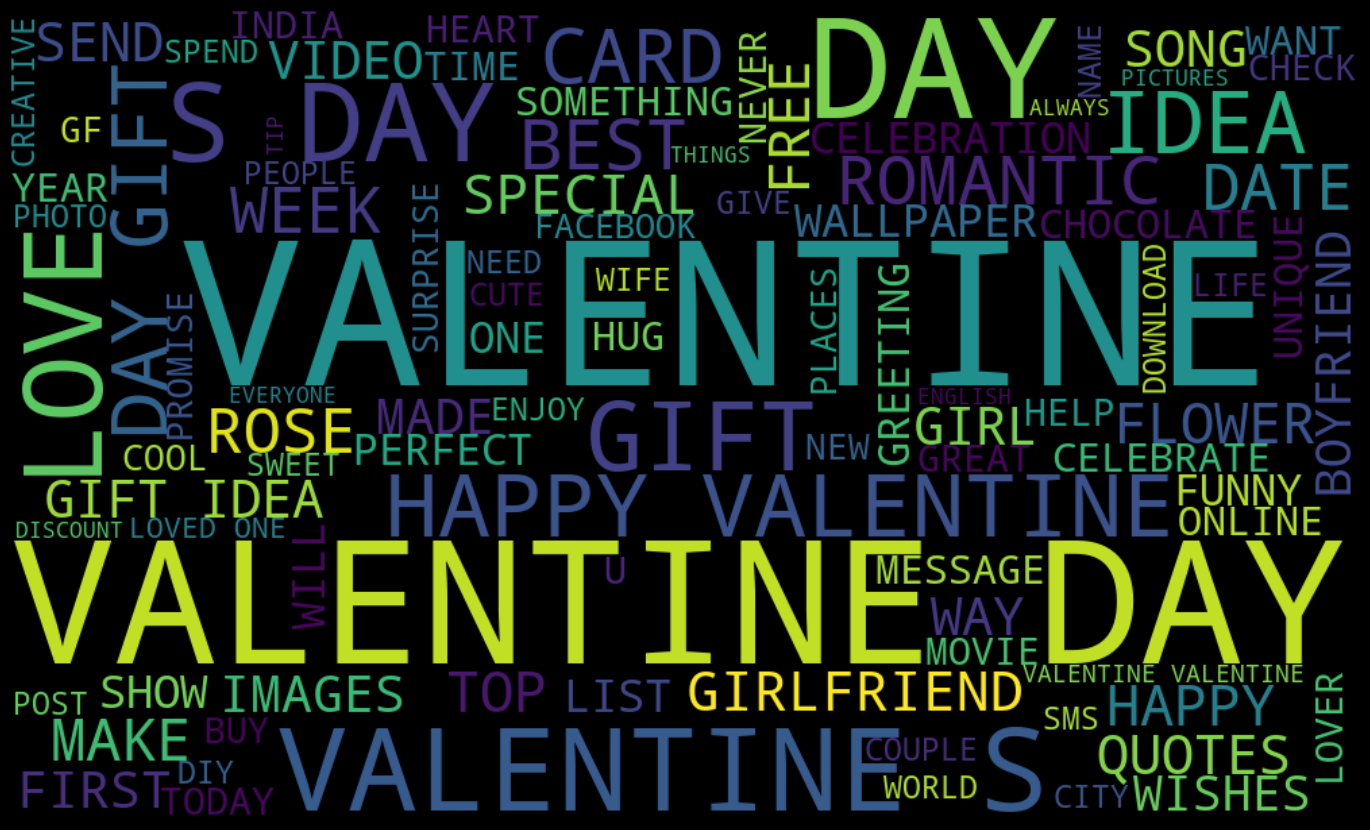

In [142]:
text = ' '.join( [twts for twts in Valentine_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

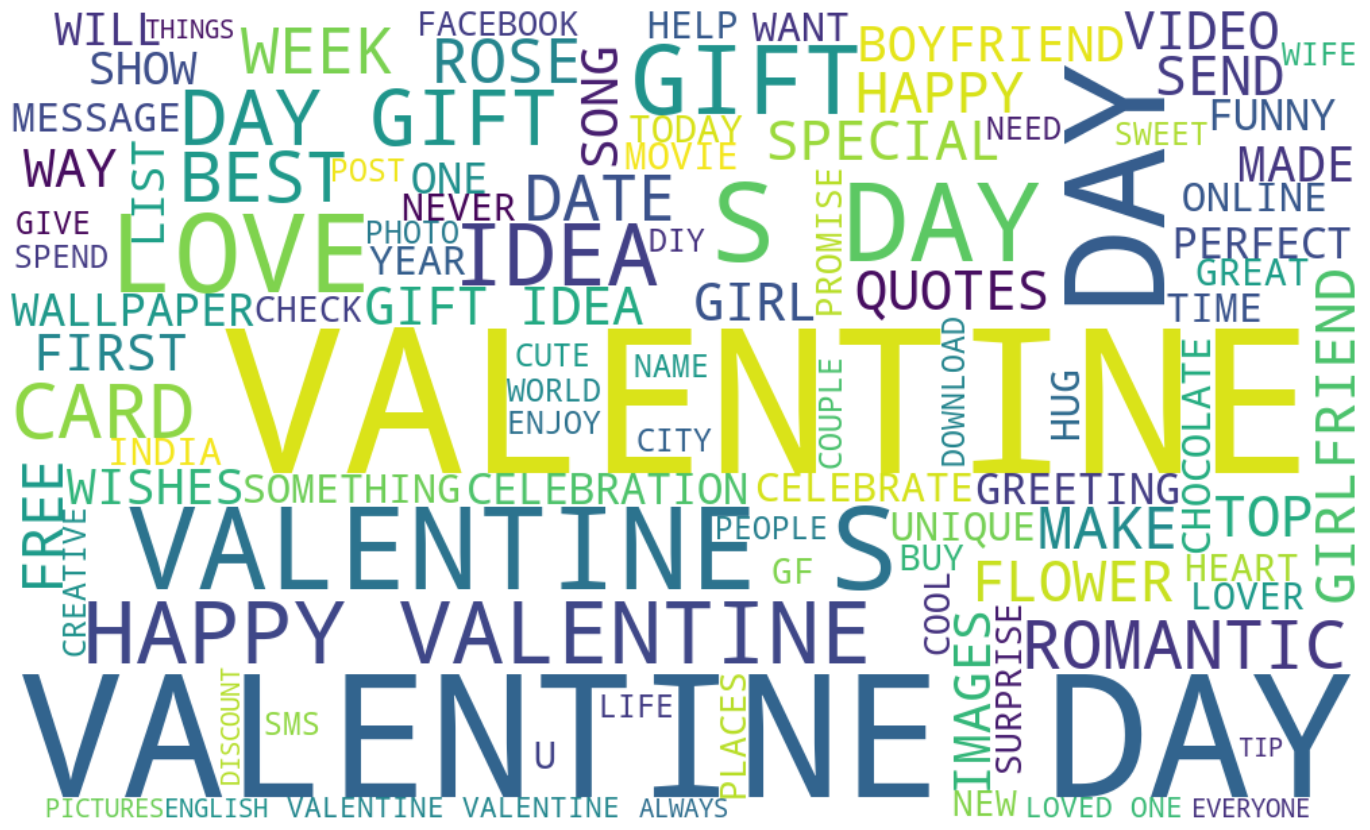

In [141]:
# Initialize a WordCloud object with specified parameters
wc = WordCloud(background_color='white', width = 1000, height=600, max_words=100, margin=2)

# Fit the word frequencies from freq_df DataFrame into the WordCloud object
wc.fit_words(freq_Valentine_df['freq'].to_dict() )

# Create a new figure with specified size and facecolor
plt.figure(figsize = (20, 10), facecolor = 'none')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

# Display the word cloud
plt.show()

<font size="3"><b><CENTER>RANDOM REGEX EXPRESSIONS</CENTER> <b></font>

<font size="3"><b>EMAIL ADDRESS<b></font>

In [143]:
import re

# Define the email address to validate
email = "alekya.reddy@example.com"

# Use regular expression to match the email address pattern
if re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$', email):
    # If the email address matches the pattern, print "Valid email address"
    print("Valid email address")
else:
    # If the email address does not match the pattern, print "Invalid email address"
    print("Invalid email address")

Valid email address


<font size="3"><b>URL<b></font>

In [144]:
import re

# Define the URL to validate
url = "https://www.shutransit.com"

# Use regular expression to match the URL pattern
if re.match(r'^(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$', url):
    # If the URL matches the pattern, print "Valid URL"
    print("Valid URL")
else:
    # If the URL does not match the pattern, print "Invalid URL"
    print("Invalid URL")

Valid URL


<font size="3"><b>FILE PATH<b></font>

In [147]:
import re

# Define the file path to validate
file_path = "/alekya/docs/file/data.csv"

# Use regular expression to match the file path pattern
if re.match(r'^\/(?:[^\/\n]+\/)*[^\/\n]+\.[a-zA-Z0-9]+$', file_path):
    # If the file path matches the pattern, print "Valid file path"
    print("Valid file path")
else:
    # If the file path does not match the pattern, print "Invalid file path"
    print("Invalid file path")

Valid file path


<font size="3"><b>PHONE NUMBER<b></font>

In [152]:
import re

# Define the phone number to validate
phone_number = "+1 (555) 123-4567"

# Use regular expression to match the phone number pattern
if re.match(r'^\+(?:[0-9] ?){6,14}[0-9]$', phone_number):
    # If the phone number matches the pattern, print "Valid phone number"
    print("Valid phone number")
else:
    # If the phone number does not match the pattern, print "Invalid phone number"
    print("Invalid phone number")

Invalid phone number


<font size="3"><b>VARIABLE NAME<b></font>

In [153]:
import re

# Define the variable name to validate
name= "alekya"

# Use regular expression to match the variable name pattern
if re.match(r'^[a-zA-Z_][a-zA-Z0-9_]*$', name):
    # If the variable name matches the pattern, print "Valid variable name"
    print("Valid variable name")
else:
    # If the variable name does not match the pattern, print "Invalid variable name"
    print("Invalid variable name")

Valid variable name
